# 10. 워드 임베딩(Word Embedding)

## 08) 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

### 1. 케라스 임베딩 층(Keras Embedding layer)

#### 1) 임베딩 층은 룩업 테이블이다.

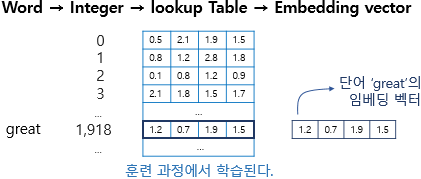

In [1]:
import numpy as np

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 고려하여 +1
print('단어 집합 :',vocab_size)

단어 집합 : 16


In [3]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [4]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6958 - acc: 0.5714
Epoch 2/100
1/1 - 0s - loss: 0.6943 - acc: 0.5714
Epoch 3/100
1/1 - 0s - loss: 0.6929 - acc: 0.5714
Epoch 4/100
1/1 - 0s - loss: 0.6914 - acc: 0.5714
Epoch 5/100
1/1 - 0s - loss: 0.6900 - acc: 0.5714
Epoch 6/100
1/1 - 0s - loss: 0.6886 - acc: 0.7143
Epoch 7/100
1/1 - 0s - loss: 0.6871 - acc: 0.7143
Epoch 8/100
1/1 - 0s - loss: 0.6857 - acc: 0.7143
Epoch 9/100
1/1 - 0s - loss: 0.6843 - acc: 0.7143
Epoch 10/100
1/1 - 0s - loss: 0.6829 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.6815 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.6801 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.6787 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.6773 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.6759 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.6745 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.6730 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.6716 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.6702 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.6688 - a

### 2. 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

#### 1) 사전 훈련된 GloVe 사용하기

In [7]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

# urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", 
#             filename="preTrained/glove.6B.zip")
# zf = zipfile.ZipFile('preTrained/glove.6B.zip')
# zf.extractall() 
# zf.close()

In [8]:
embedding_dict = dict()

f = open('preTrained/glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


임의의 단어 'respectable'의 임베딩 벡터값과 크기를 출력해봅니다.

In [9]:
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

모든 값이 0으로 채워진 임베딩 행렬을 만들어줍니다.

In [10]:
embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :', np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 100)


기존 데이터의 각 단어와 맵핑된 정수값을 확인해봅시다.

In [11]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [12]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

Embedding layer에 embedding_matrix를 초기값으로 설정합니다. 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

output_dim = 100

model = Sequential()
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6752 - acc: 0.7143
Epoch 2/100
1/1 - 0s - loss: 0.6535 - acc: 0.7143
Epoch 3/100
1/1 - 0s - loss: 0.6325 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6125 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.5933 - acc: 0.7143
Epoch 6/100
1/1 - 0s - loss: 0.5749 - acc: 0.8571
Epoch 7/100
1/1 - 0s - loss: 0.5573 - acc: 0.8571
Epoch 8/100
1/1 - 0s - loss: 0.5406 - acc: 0.8571
Epoch 9/100
1/1 - 0s - loss: 0.5246 - acc: 0.8571
Epoch 10/100
1/1 - 0s - loss: 0.5093 - acc: 0.8571
Epoch 11/100
1/1 - 0s - loss: 0.4947 - acc: 0.8571
Epoch 12/100
1/1 - 0s - loss: 0.4808 - acc: 0.8571
Epoch 13/100
1/1 - 0s - loss: 0.4674 - acc: 0.8571
Epoch 14/100
1/1 - 0s - loss: 0.4545 - acc: 0.8571
Epoch 15/100
1/1 - 0s - loss: 0.4422 - acc: 0.8571
Epoch 16/100
1/1 - 0s - loss: 0.4304 - acc: 0.8571
Epoch 17/100
1/1 - 0s - loss: 0.4189 - acc: 0.8571
Epoch 18/100
1/1 - 0s - loss: 0.4080 - acc: 0.8571
Epoch 19/100
1/1 - 0s - loss: 0.3974 - acc: 0.8571
Epoch 20/100
1/1 - 0s - loss: 0.3871 - a

### 2) 사전 훈련된 Word2Vec 사용하기

In [14]:
import gensim

# urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
#             filename="preTrained/GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('preTrained/GoogleNews-vectors-negative300.bin.gz', binary=True)

print('모델의 크기(shape) :',word2vec_model.vectors.shape) # 모델의 크기 확인

모델의 크기(shape) : (3000000, 300)


모든 값이 0으로 채워진 임베딩 행렬을 만들어줍니다.

In [15]:
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 300)


word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 하는 함수 get_vector()를 구현합니다.

In [16]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [17]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습시켜보겠습니다.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
# model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6977 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.6791 - acc: 0.5714
Epoch 3/100
1/1 - 0s - loss: 0.6611 - acc: 0.7143
Epoch 4/100
1/1 - 0s - loss: 0.6436 - acc: 0.7143
Epoch 5/100
1/1 - 0s - loss: 0.6266 - acc: 1.0000
Epoch 6/100
1/1 - 0s - loss: 0.6102 - acc: 1.0000
Epoch 7/100
1/1 - 0s - loss: 0.5943 - acc: 1.0000
Epoch 8/100
1/1 - 0s - loss: 0.5790 - acc: 1.0000
Epoch 9/100
1/1 - 0s - loss: 0.5641 - acc: 1.0000
Epoch 10/100
1/1 - 0s - loss: 0.5498 - acc: 1.0000
Epoch 11/100
1/1 - 0s - loss: 0.5359 - acc: 1.0000
Epoch 12/100
1/1 - 0s - loss: 0.5226 - acc: 1.0000
Epoch 13/100
1/1 - 0s - loss: 0.5096 - acc: 1.0000
Epoch 14/100
1/1 - 0s - loss: 0.4971 - acc: 1.0000
Epoch 15/100
1/1 - 0s - loss: 0.4850 - acc: 1.0000
Epoch 16/100
1/1 - 0s - loss: 0.4734 - acc: 1.0000
Epoch 17/100
1/1 - 0s - loss: 0.4621 - acc: 1.0000
Epoch 18/100
1/1 - 0s - loss: 0.4511 - acc: 1.0000
Epoch 19/100
1/1 - 0s - loss: 0.4406 - acc: 1.0000
Epoch 20/100
1/1 - 0s - loss: 0.4303 - a